In [1]:
from xgcm import Grid

import numpy as np  # numerical library
import xarray as xr  # netCDF library
import pandas as pd

import matplotlib.pyplot as plt  # plotting library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
import cftime

import seawater as sw

In [2]:
sw.pres(np.arange(10,1900,10),24.5)

array([  10.06892276,   20.13829675,   30.20812203,   40.27839867,
         50.34912672,   60.42030624,   70.49193731,   80.56401997,
         90.63655428,  100.70954032,  110.78297813,  120.85686779,
        130.93120934,  141.00600286,  151.0812484 ,  161.15694602,
        171.23309579,  181.30969776,  191.386752  ,  201.46425856,
        211.54221751,  221.62062891,  231.69949282,  241.77880931,
        251.85857842,  261.93880022,  272.01947478,  282.10060215,
        292.1821824 ,  302.26421559,  312.34670177,  322.42964101,
        332.51303337,  342.59687891,  352.6811777 ,  362.76592978,
        372.85113523,  382.93679411,  393.02290647,  403.10947238,
        413.1964919 ,  423.28396509,  433.37189201,  443.46027273,
        453.54910729,  463.63839578,  473.72813823,  483.81833473,
        493.90898532,  504.00009008,  514.09164906,  524.18366232,
        534.27612992,  544.36905193,  554.46242841,  564.55625941,
        574.65054501,  584.74528525,  594.84048021,  604.93612

In [3]:
z = np.arange(2, 12)
theta = xr.DataArray(np.log(z), dims=['z'], coords={'z': z})
phi = xr.DataArray(np.flip(np.log(z)*0.5+ np.random.rand(len(z))), dims=['z'], coords={'z':z})
ds = xr.Dataset({'phi': phi, 'theta': theta})
ds

<xarray.Dataset> Size: 240B
Dimensions:  (z: 10)
Coordinates:
  * z        (z) int64 80B 2 3 4 5 6 7 8 9 10 11
Data variables:
    phi      (z) float64 80B 2.148 1.901 1.535 1.587 ... 1.502 1.283 0.5689
    theta    (z) float64 80B 0.6931 1.099 1.386 1.609 ... 2.197 2.303 2.398

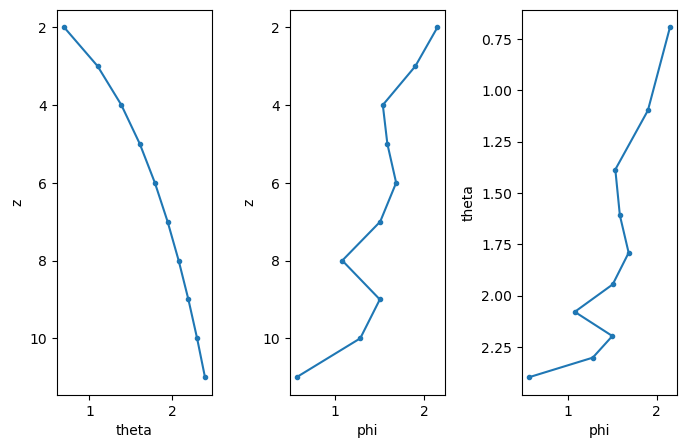

In [4]:
def plot_profile():
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=[8,5])
    ds.theta.plot(ax=ax1, y='z', marker='.', yincrease=False)
    ds.phi.plot(ax=ax2, y='z', marker='.', yincrease=False)
    ds.swap_dims({'z': 'theta'}).phi.plot(ax=ax3, y='theta', marker='.', yincrease=False)
    fig.subplots_adjust(wspace=0.5)
    return ax3

plot_profile();

In [5]:
# First create an xgcm grid object
grid = Grid(ds, coords={'Z': {'center':'z'}}, periodic=False)


In [6]:
# define the target values in density, linearly spaced
theta_target = np.linspace(0, 3, 20)

In [7]:
# and transform
phi_transformed = grid.transform(ds.phi, 'Z', theta_target, target_data=ds.theta)
phi_transformed

/Users/pvb/miniconda3/envs/ocean/lib/python3.11/site-packages/xgcm/grid.py:989: FutureWarning: From version 0.8.0 the Axis computation methods will be removed, in favour of using the Grid computation methods instead. i.e. use `Grid.transform` instead of `Axis.transform`
  warnings.warn(


<xarray.DataArray 'phi' (theta: 20)> Size: 160B
array([       nan,        nan,        nan,        nan,        nan,
       2.08938672, 1.99295968, 1.89215378, 1.69177038, 1.54345607,
       1.57960441, 1.65533893, 1.56543688, 1.16648406, 1.47437815,
       0.7896268 ,        nan,        nan,        nan,        nan])
Coordinates:
  * theta    (theta) float64 160B 0.0 0.1579 0.3158 0.4737 ... 2.684 2.842 3.0

In [9]:
phi_transformed

<xarray.DataArray 'phi' (theta: 20)> Size: 160B
array([       nan,        nan,        nan,        nan,        nan,
       2.08938672, 1.99295968, 1.89215378, 1.69177038, 1.54345607,
       1.57960441, 1.65533893, 1.56543688, 1.16648406, 1.47437815,
       0.7896268 ,        nan,        nan,        nan,        nan])
Coordinates:
  * theta    (theta) float64 160B 0.0 0.1579 0.3158 0.4737 ... 2.684 2.842 3.0

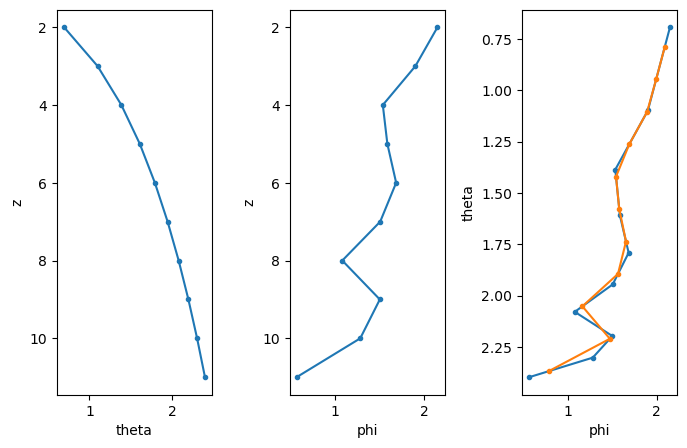

In [8]:
ax = plot_profile()
phi_transformed.plot(ax=ax, y='theta', marker='.')